In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


### 1.Load the dataframe and ensure data quality by checking for missing values and duplicate rows. Handle missing values and remove duplicate rows if necessary.


In [3]:
df = pd.read_csv('spotify.csv')
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [4]:
df.shape

(440, 5)

In [5]:
df.describe()

,Popularity,Duration (ms)
count,440.000000,440.000000
mean,75.736364,206810.040909
std,9.886534,53576.930289
min,29.000000,81666.000000
25%,70.000000,172778.500000
50%,77.000000,201866.000000
75%,83.000000,235119.750000
max,97.000000,501648.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [7]:
df.duplicated().value_counts()

False    413
True      27
Name: count, dtype: int64

In [8]:
df.drop_duplicates(keep='first')

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
433,French Montana,Stand United,54,163971,01CHrTerCzyRpMI1MzQ4fz
434,Jason Derulo,Tip Toe (feat. French Montana),65,187521,0TY3jVGwGDwDabLyQLVRQQ
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS


### 2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

<Axes: xlabel='Popularity', ylabel='Count'>

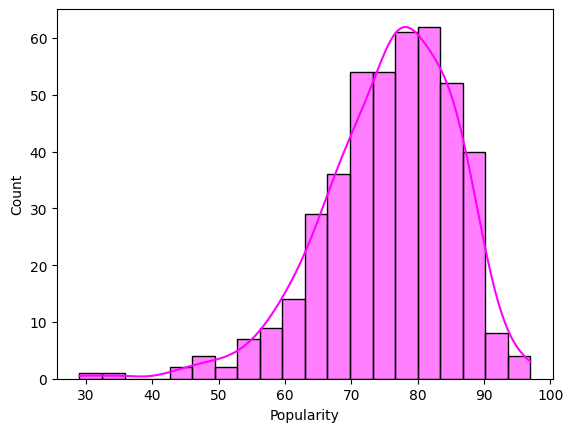

In [9]:
sns.histplot(df['Popularity'],kde=True, color='Magenta')
# distribution is little left skewed

### 3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

<Axes: xlabel='Popularity', ylabel='Duration (ms)'>

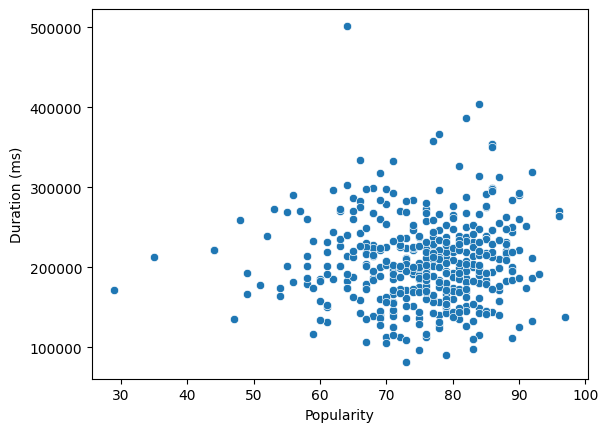

In [10]:
sns.scatterplot(data = df , x = 'Popularity',y = 'Duration (ms)')
# majority of artist population has popularity between 70-90 and duration 150000 and 250000

### 4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

In [11]:
# calculate track count for each artist
ans = df.groupby('Artist', as_index=False).agg(total_tracks = ('Track Name', 'count'))
# sort data according to track counts in descending order
ans = ans.sort_values(by = 'total_tracks', ascending= False)
# get the first record from sorted dataframe
ans.head(1)
# here we have see that Drake has highest number of tracks

,Artist,total_tracks
29,Drake,20


### 5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

In [12]:
# sort the data according to Popularity, so the top 5 will be least popular tracks
df.sort_values(by = 'Popularity').head(5)[['Artist','Track Name']]


,Artist,Track Name
207,Pressa,Attachments (feat. Coi Leray)
231,Justin Bieber,Intentions
435,French Montana,Splash Brothers
413,French Montana,Splash Brothers
225,Lil Baby,On Me - Remix


### 6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

In [13]:
# get the average popularity for each artist
popular_artist = df.groupby('Artist', as_index=False).agg(avg_popularity = ('Popularity', 'mean'))
# sort the data in descending order of average popularity
popular_artist = popular_artist.sort_values(by = 'avg_popularity', ascending= False)
popular_artist

,Artist,avg_popularity
113,cassö,92.000000
104,Trueno,89.000000
24,David Guetta,87.000000
103,Travis Scott,87.000000
114,¥$,86.090909
...,...,...
89,RAYE,55.000000
107,Wyclef Jean,54.500000
7,Arizona Zervas,54.000000
52,Justin Bieber,49.000000


### top 5 Artists having highest avg popularity.

In [14]:
# take to the top 5 records to show artists with highest popularity.
popular_artist.head(5)

,Artist,avg_popularity
113,cassö,92.000000
104,Trueno,89.000000
24,David Guetta,87.000000
103,Travis Scott,87.000000
114,¥$,86.090909


### 7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.


In [20]:
# get top 5 most popular artists calculated in previous question
top5_artist = popular_artist.head(5)
# get all the data for these top 5 artists
artist_df = df[df['Artist'].isin(top5_artist['Artist'])]
# calculate maximum popularity value for these artists
adf = artist_df.groupby('Artist', as_index = False)['Popularity'].max()
# now join it with artists data to get the track with highest popularity for each artist.
artist_df.merge(adf, how ='inner', on = ['Artist', 'Popularity'])[['Artist', 'Track Name']].sort_values(by = 'Artist')

,Artist,Track Name
2,David Guetta,Baby Don't Hurt Me
0,Travis Scott,FE!N (feat. Playboi Carti)
6,Travis Scott,FE!N (feat. Playboi Carti)
3,Trueno,Mamichula - con Nicki Nicole
1,cassö,Prada
4,¥$,CARNIVAL
5,¥$,CARNIVAL


### 8.Visualize relationships between multiple numerical variables simultaneously using a pair plot.

<Figure size 5000x1000 with 0 Axes>

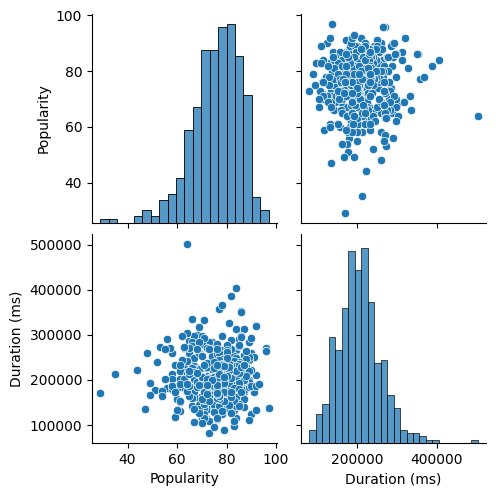

In [40]:
plt.figure(figsize = (50,10))
#  get the numerical columns from the dataset
lst = [i for i in df if df[i].dtype != 'O']
# draw the pairplot
sns.pairplot(df[lst])

### 9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.


Text(0.5, 1.0, 'Boxplot of Artist via Duration (ms)')

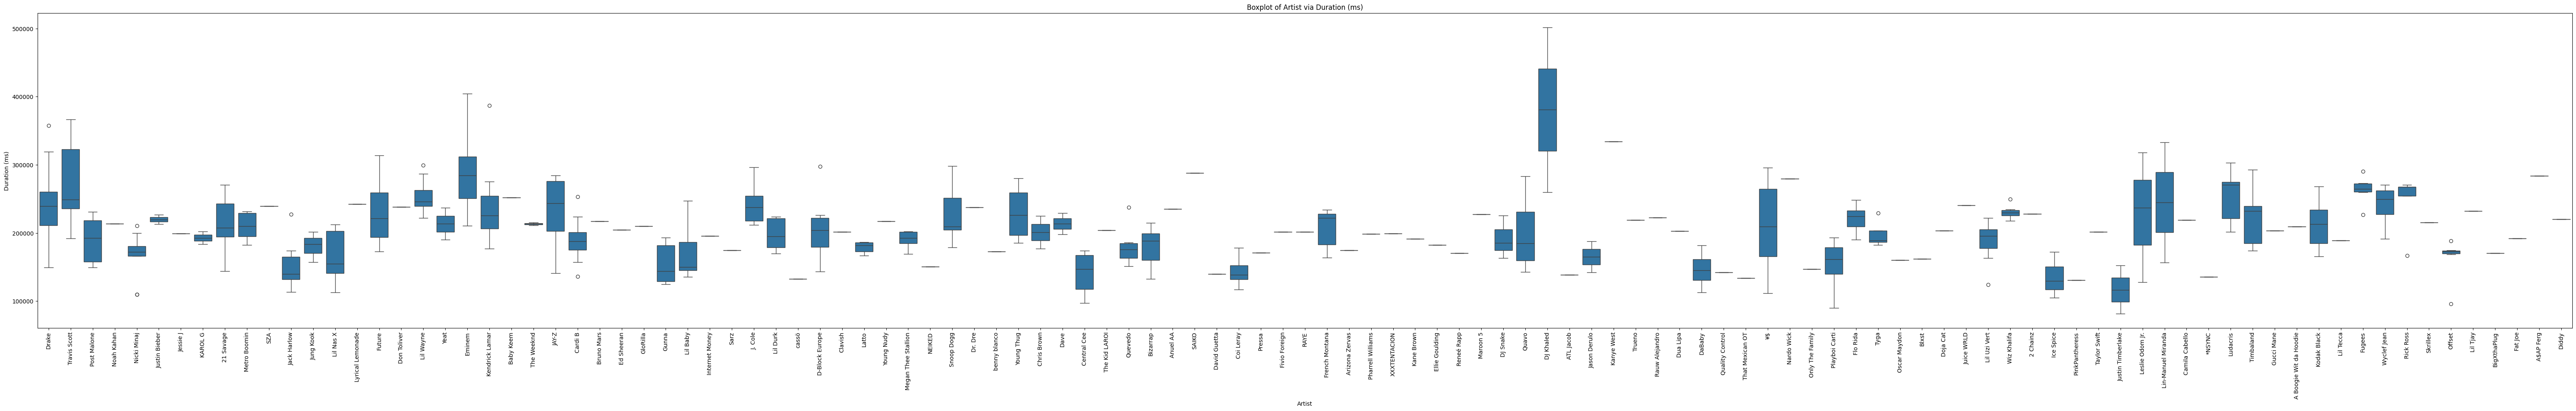

In [35]:
plt.figure(figsize = (80,10))
# draw the box plot for artist regarding their track duration
sns.boxplot(data = df, x = 'Artist', y = 'Duration (ms)')
#  add xlabel, ylabel, title
plt.xlabel('Artist')
# rotate the label values for x axis to 90 degree.
plt.xticks(rotation =90)
plt.ylabel('Duration (ms)')
plt.title('Boxplot of Artist via Duration (ms)')

### 10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

Text(0.5, 1.0, 'swarmplot of Artist via Popularity')

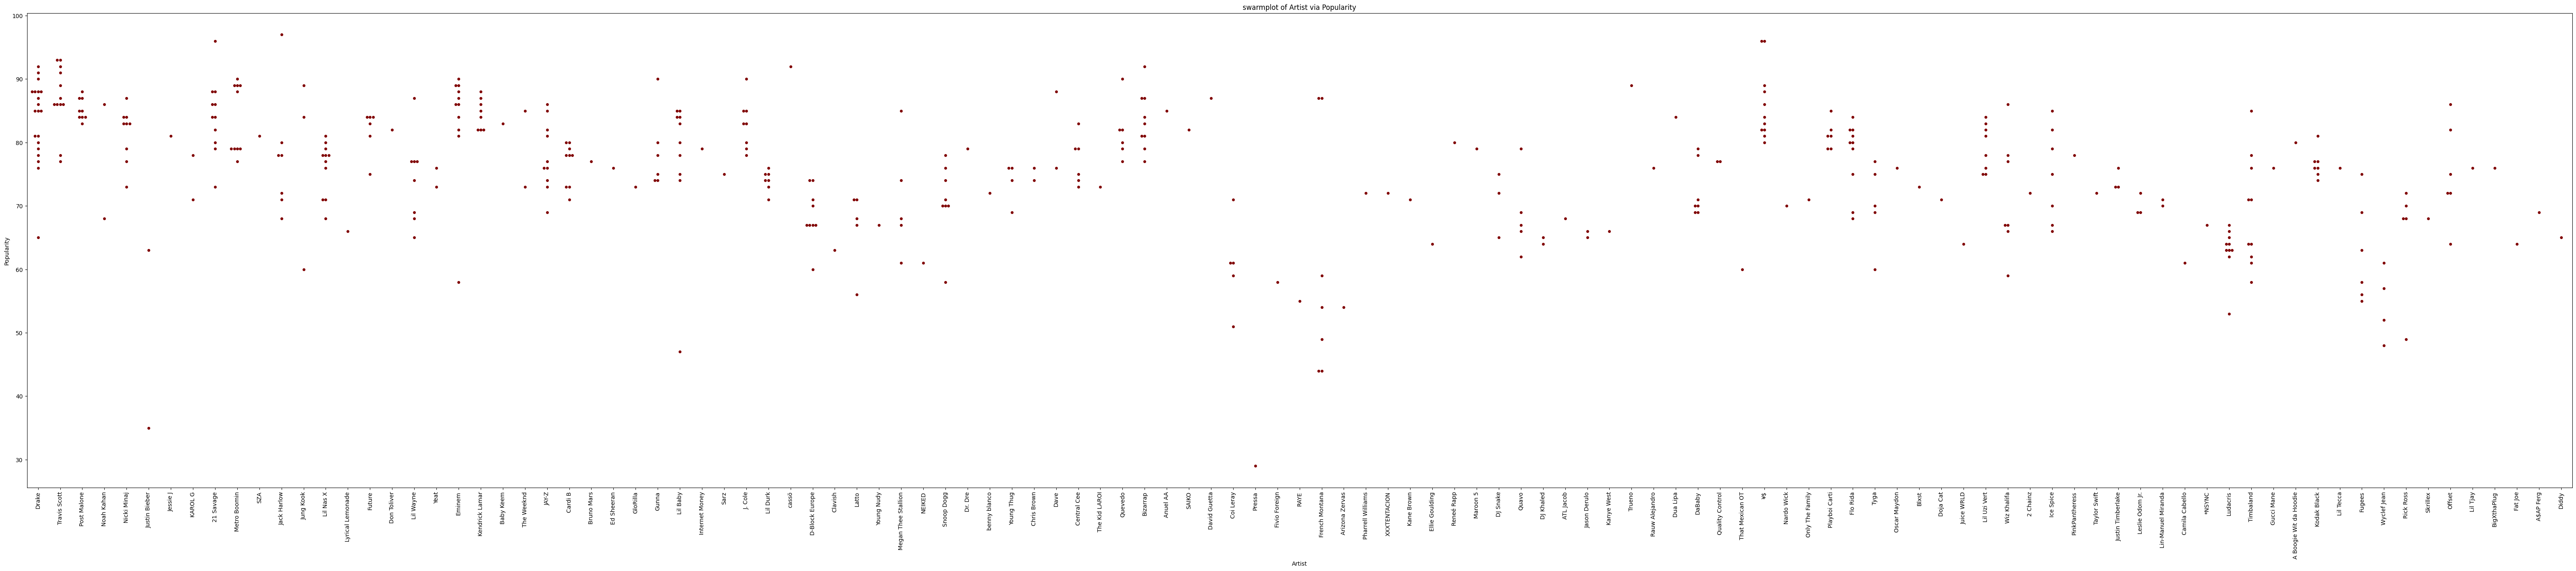

In [43]:

plt.figure(figsize = (80,15))
# draw the swarm plot for artist regarding their track duration
sns.swarmplot(data = df, x = 'Artist', y = 'Popularity', color='maroon')
#  add xlabel, ylabel, title
plt.xlabel('Artist')
# rotate the label values for x axis to 90 degree.
plt.xticks(rotation =90)
plt.ylabel('Popularity')
plt.title('swarmplot of Artist via Popularity')